
# Exploratory Data Analysis Notebook #1 (Introductory)

This notebook is 1/2 of exploratory data analysis done for [An all-out test to determine finger flexor critical force in rock climbers by Giles et al](https://www.researchgate.net/publication/343601001_An_all-out_test_to_determine_finger_flexor_critical_force_in_rock_climbers)


This notebook contains the introductory overview into our research group (n=121) and we'll be representing aspects of their demographics graphically. 

We'll be going over some basic demographics: Gender, age distribution, height/weight, preferred climbing disciplines



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import df_cleaning

To start off, we're going to clean the dataframe that we've received using a module (df_cleaning) which cleans the Climbing Critical Force Data we're using for data analysis.

 We're going to be dropping all columns and rows which contain NaN values in all their cells to allow us to work and interact with the data easier.

In [9]:
dataframe = df_cleaning.clean('Climbing Critical Force Data - Giles et al 2020.csv')


To get a sense of the data we're working with, I've included the head() of the file below.

In [11]:
dataframe.head()

,#,SEX,AGE (YRS),HEIGHT (CM),BODY MASS (KG),YRS CLIMBING,CLIMB HRS WEEK,TRAIN HRS WEEK,SPORT GRADE IRCRA,BOULDER GRADE IRCRA,# REPS,PEAK FORCE (KG),PEAK FORCE % BODY MASS,CF (KG),CF % PEAK FORCE,CF % BODY MASS,40% MVC (KG),W' (KG),W' PER KG BODY MASS
0,0.0,Female,38.0,164.0,56.5,10.0,3.0,0.0,NaN,19.0,24.0,33.28,58.9%,12.85,38.6%,22.7%,9.98,579.31,10.25
1,1.0,Female,28.0,157.5,56.1,13.0,14.0,4.0,NaN,21.5,24.0,42.01,74.9%,13.52,32.2%,24.1%,16.80,1088.38,19.40
2,2.0,Female,26.0,159.0,51.8,2.0,5.0,0.8,NaN,17.0,24.0,39.73,76.7%,11.08,27.9%,21.4%,15.89,884.00,17.06
3,3.0,Female,26.0,169.0,56.3,8.0,6.0,2.0,15.0,19.0,24.0,33.31,59.2%,7.84,23.5%,13.9%,13.32,463.40,8.23
4,4.0,Female,22.0,173.5,71.8,8.0,9.0,2.0,NaN,20.5,24.0,50.55,70.4%,16.84,33.3%,23.5%,20.22,968.50,13.49


Here is a _summary_ of the contents of the dataframe. 

In [13]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
#,121.0,80.388430,56.117789,0.00,38.00,74.00,105.00,202.00
AGE (YRS),120.0,31.625000,8.548490,18.00,26.00,31.00,35.25,57.00
HEIGHT (CM),119.0,171.463025,8.922794,153.00,165.00,171.50,177.85,193.40
BODY MASS (KG),121.0,66.507438,10.278060,46.60,58.00,65.00,74.20,91.20
YRS CLIMBING,114.0,8.268421,7.440006,0.00,3.00,6.00,11.00,40.00
CLIMB HRS WEEK,111.0,8.300901,6.176282,2.00,6.00,7.00,9.00,56.00
TRAIN HRS WEEK,105.0,3.037143,4.250345,0.00,0.50,2.00,4.00,30.00
SPORT GRADE IRCRA,80.0,19.075000,3.121080,13.00,17.00,19.00,21.00,28.00
BOULDER GRADE IRCRA,72.0,20.381944,2.392025,16.50,19.00,20.00,21.00,27.00
# REPS,121.0,26.280992,2.924674,24.00,24.00,24.00,30.00,30.00


## Gender

We wanted to start with a very basic demographic and gender felt like a good starting point, as there were adjustments done to account for differences during the experiment regarding the measurements of climbing performance.

Out of our data of 121 participants: 56 were female, 65 were male.

In [15]:
gender_pie = dataframe.groupby(by='SEX').size()
gender_pie

SEX
Female    56
Male      65
dtype: int64

<AxesSubplot:ylabel='Gender'>

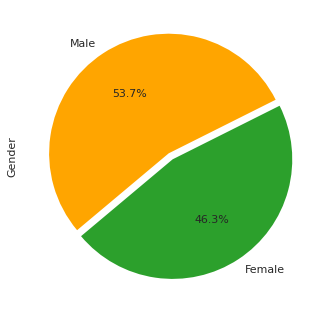

In [17]:
#Gender Pie Chart done through Pandas 
gender_explode = (0.03,0.03)
gender_pie.plot.pie(autopct="%.1f%%", fontsize=11, label="Gender", explode=gender_explode, startangle = 220, colors=['tab:green','orange'])


## Age Distribution 
Our next demographic, and something that we were curious about was the age distribution. We wanted to get a little more insight on the makeup of our research group, so we categorized our ages into bins and decided to plot that through a histogram with 7 bins.

The majority of our research group are between the ages of 25 and 35.

In [19]:
age_bins = [18, 21, 25, 30, 35, 40, 50, 60]
age_bin_labels = ['18 to 21', '21 to 25','25 to 30','30 to 35','35 to 40', '40 to 50', '50 to 60']



We decided to create our own unique bins, both for visual appeal and to help categorize the ages into more distinctive age brackets.  


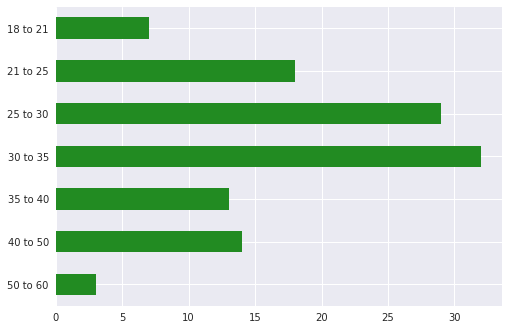

In [28]:
age_bin = (pd.cut(dataframe['AGE (YRS)'],bins=age_bins,labels =age_bin_labels).value_counts().sort_index(ascending=False)).to_frame()
age_bin.plot(kind='barh',legend=False,color='forestgreen')
plt.style.use('seaborn') 

## Scatterplot Height (CM) and Weight (KG)

Height and weight seemed like the next interesting area to explore further. We wanted to create a spread for the 121 different people, and see if there were any clusters/ interesting relationships in our research group through a scatterplot

Aside from the small cluster of 5'6 130ish pound climbers (climber's like me!) the distribution seemed to be relatively evenly spread throughout.


<AxesSubplot:xlabel='HEIGHT (CM)', ylabel='BODY MASS (KG)'>

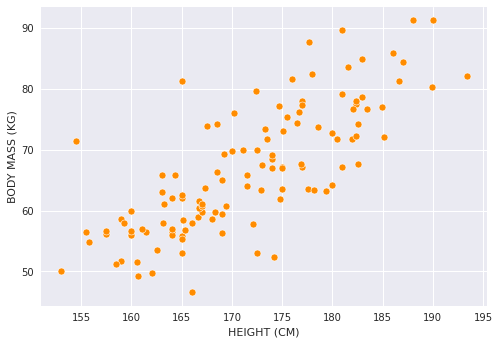

In [29]:
#Create Seaborn Scatterplot
plt.title('Height (CM) and Weight (KG)')
sns.scatterplot(data = dataframe, x="HEIGHT (CM)", y="BODY MASS (KG)",color='darkorange')

## Climbing Disciplines:  Sport vs Bouldering vs Both

To begin our deep dive into the heart of the information, we wanted to start with one last basic overview, a spread of what climbing disciplines that our participants preferred.

 To get the data from our chart, we utilized different applications of .notnull() and .isnull() as well as .sum() to get the values for participants that either only did bouldering, only did sport climbing, or recorded both disciplines.


In [30]:
#Value of climbers that only boulder (Intersection of all Boulderers with non NaN values and Sport Climbers NaN values)

only_boulder = (dataframe['BOULDER GRADE IRCRA'].notnull() & dataframe['SPORT GRADE IRCRA'].isnull()).sum()
only_boulder

41

In [31]:
#Value of climbers that only sport climb (Intersection of all Sport Climbers with non NaN values and Boulderers NaN values)

only_sport = (dataframe['BOULDER GRADE IRCRA'].isnull() & dataframe['SPORT GRADE IRCRA'].notnull()).sum()
only_sport

49

In [32]:
#Value of climbers that do both (Both non NaN values)

both = (dataframe['SPORT GRADE IRCRA'].notnull() & dataframe['BOULDER GRADE IRCRA'].notnull()).sum()
both

31

(0.0, 60.0)

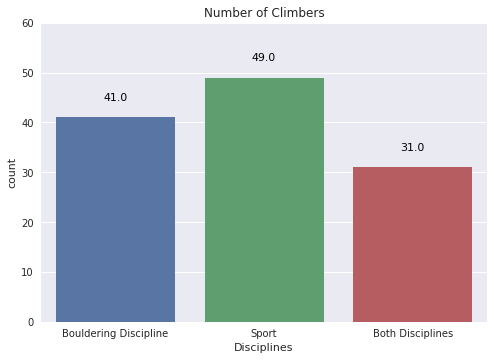

In [33]:
# Create a new dataframe to represent this information
db = {'Disciplines': ["Bouldering Discipline", "Sport", "Both Disciplines"], 'count': [only_boulder, only_sport, both]}
disciplines_bar = pd.DataFrame(db)

# Plot dataframe in a seaborn barplot
ax = sns.barplot(data=disciplines_bar, x="Disciplines", y="count",)
plt.title('Number of Climbers')

# Create annotations in chart
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
ax.set_ylim(0,60) #To make space for the annotations